In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('C:/Users/yashg/Documents/Cloud_Data_Files/')

In [199]:
data=pd.read_csv('CDC_calculations.csv')
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'Time(s)', 'Height', 'LWC',
       'LWC_sd', 'Mean_Doppler_Velocity', 'Mean_Doppler_Velocity_sd',
       'Spectral_width', 'Spectral_width_sd', 'Reflectivity',
       'Reflectivity_sd', 'Extinction', 'Temperature', 'CCN', 'T(K)',
       'CDC_pinsky,k=0.3', 'Smax,k=0.3', 'CDC_pinsky,k=0.4', 'Smax,k=0.4',
       'CDC_pinsky,k=0.5', 'Smax,k=0.5', 'CDC_pinsky,k=0.6', 'Smax,k=0.6',
       'CDC_pinsky,k=0.7', 'Smax,k=0.7', 'CDC_pinsky,k=0.8', 'Smax,k=0.8',
       'CDC_pinsky,k=0.9', 'Smax,k=0.9', 'CDC_pinsky,k=1.0', 'Smax,k=1.0',
       'CDC_Fan'],
      dtype='object')

In [200]:
cdc=data['CDC_Fan']
lwc=data['LWC']
v=data['Mean_Doppler_Velocity']
t=data['T(K)']
ccn=data['CCN']
Xlist=['Liquid Water Content','Velocity','Temperature(K)','CCN']

In [201]:
d=np.column_stack([lwc,np.abs(v),t,ccn,cdc])
d= np.array(d[~np.isnan(d).any(axis=1)])
d=d[np.isfinite(d).all(1)]
X=d[:,:-1]
y=d[:,-1]

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=19)

# Linear Regression

In [203]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,y_train)
coeff=reg.coef_
b=reg.intercept_
print(f'intercept={b}')
for i,f in enumerate(Xlist):
    print(f'{f}:{coeff[i]}')

intercept=15107.996595020684
Liquid Water Content:-10687.330496617205
Velocity:4304.747476397967
Temperature(K):-43.66843634854662
CCN:0.10626052887982951


In [204]:
from sklearn.metrics import r2_score
ypred=reg.predict(X_test)
r2_score(y_test,ypred)

-0.014865533717888013

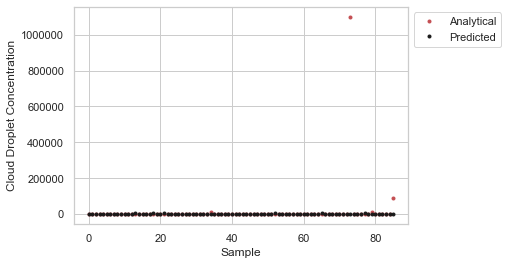

In [205]:
plt.plot(y_test,'r.',label='Analytical')
plt.plot(ypred,'k.',label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Cloud Droplet Concentration')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

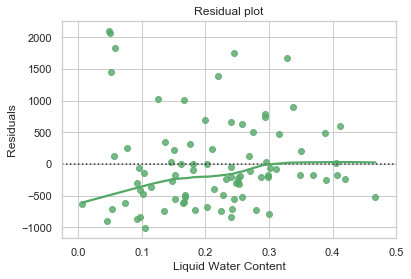

In [206]:
import seaborn as sns
sns.set(style="whitegrid")
sns.residplot(X_test[:,0],ypred, lowess=True, color="g")
plt.xlabel('Liquid Water Content')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

# Parametrizing Linear Regression

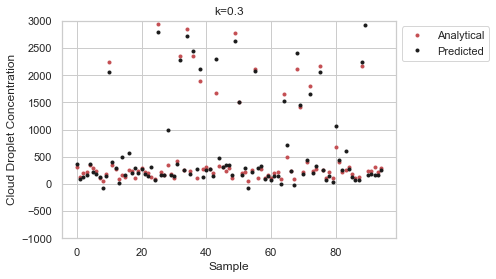

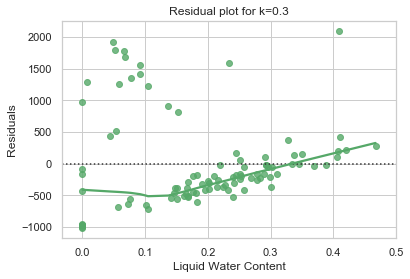

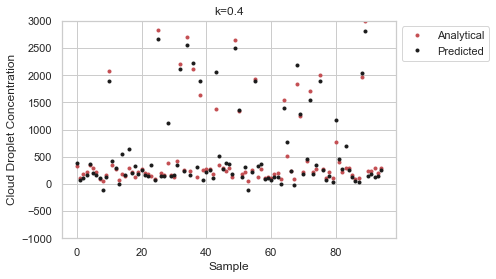

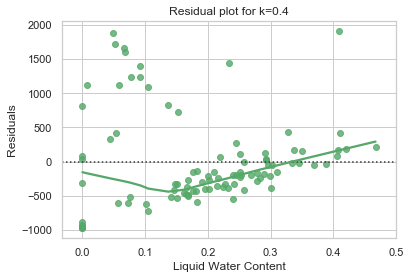

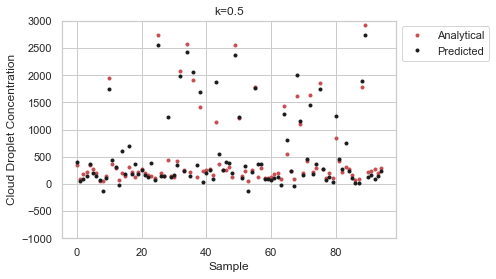

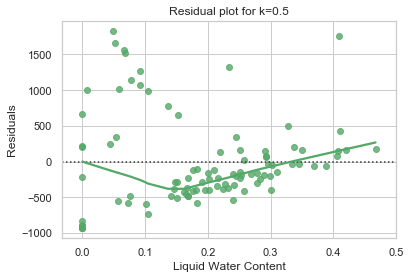

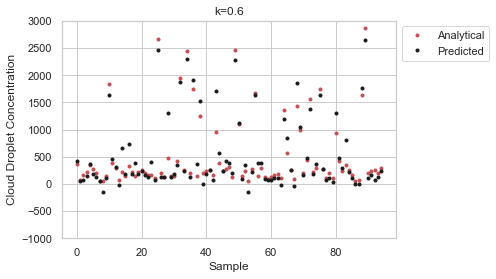

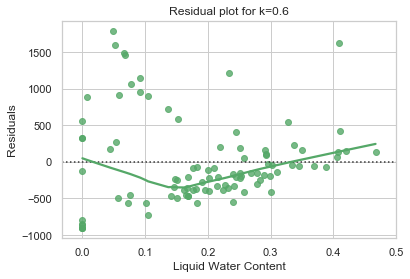

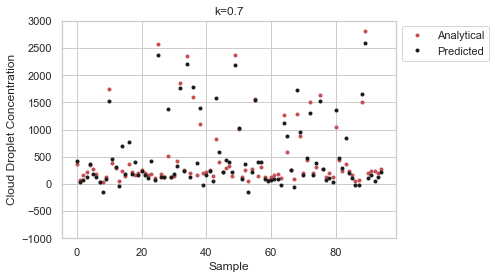

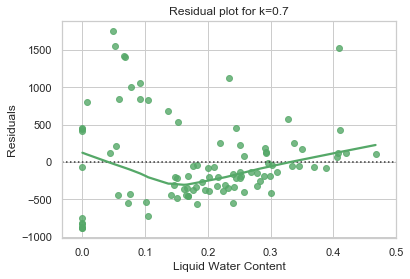

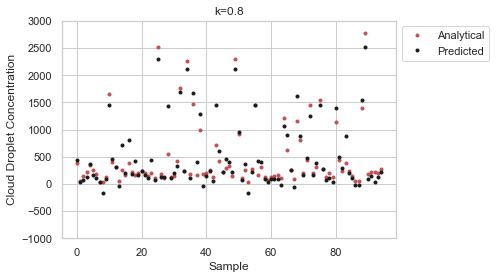

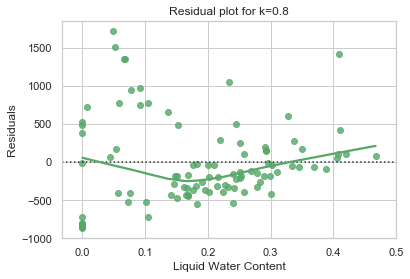

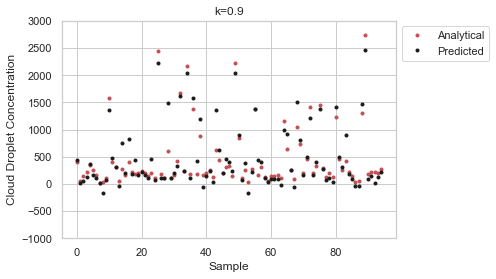

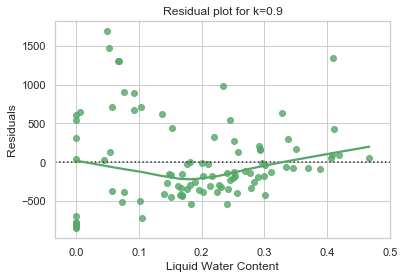

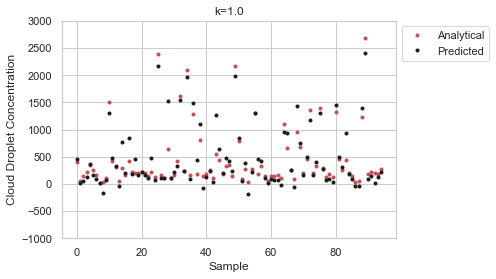

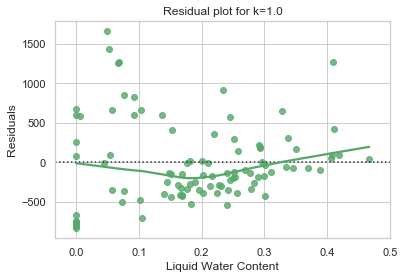

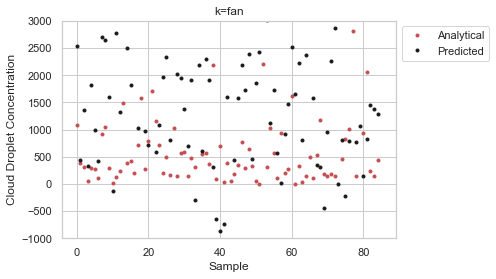

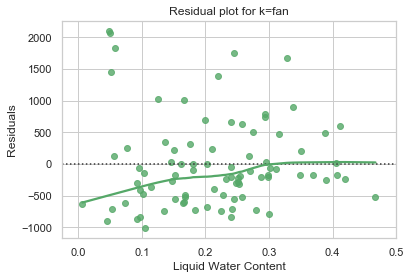

In [207]:
k=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,'fan']
lc=[]
vc=[]
tc=[]
ccnc=[]
bc=[]
r=[]
for s in k:
    if s!='fan':
        cdc=data[f'CDC_pinsky,k={s}']
    else:
        cdc=data['CDC_Fan']
    lwc=data['LWC']
    v=data['Mean_Doppler_Velocity']
    t=data['T(K)']
    ccn=data['CCN']
    d=np.column_stack([lwc,np.abs(v),t,ccn,cdc])
    d= np.array(d[~np.isnan(d).any(axis=1)])
    d=d[np.isfinite(d).all(1)]
    d[d[:,-1]<4000]
    X=d[:,:-1]
    y=d[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=19)    
    reg=LinearRegression().fit(X_train,y_train)
    coeff=reg.coef_
    b=reg.intercept_
    ypred=reg.predict(X_test)
    rr=r2_score(y_test,ypred)
    lc.append(coeff[0])
    vc.append(coeff[1])
    tc.append(coeff[2])
    ccnc.append(coeff[3])
    bc.append(b)
    r.append(rr)
    plt.plot(y_test,'r.',label='Analytical')
    plt.plot(ypred,'k.',label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Cloud Droplet Concentration')
    plt.title(f'k={s}')
    plt.ylim(-1000,3000)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()
    sns.set(style="whitegrid")
    sns.residplot(X_test[:,0],ypred, lowess=True, color="g")
    plt.xlabel('Liquid Water Content')
    plt.ylabel('Residuals')
    plt.title(f'Residual plot for k={s}')
    plt.show()

In [208]:
df={'k':k,'Intercept':bc,'LWC':lc,'Velocity':vc,'Temperature':tc,'CCN':ccnc,'R^2':r}
df_linr=pd.DataFrame(df)
df_linr[:-1]

,k,Intercept,LWC,Velocity,Temperature,CCN,R^2
0,0.3,4504.583956,-243.298244,997.388816,-16.347523,0.736127,0.965444
1,0.4,5300.624684,-289.121490,1176.452616,-19.224025,0.678817,0.948078
2,0.5,5906.112347,-324.635938,1315.696375,-21.407756,0.630671,0.931334
3,0.6,6371.873429,-352.289664,1426.305190,-23.084336,0.589621,0.916161
4,0.7,6733.197249,-373.846343,1515.890795,-24.382476,0.554173,0.903043
5,0.8,7015.147205,-390.604796,1589.750060,-25.393472,0.523221,0.892147
6,0.9,7235.885702,-403.540055,1651.643477,-26.183393,0.495934,0.883424
7,1,7408.812332,-413.396530,1704.289394,-26.800917,0.471672,0.876691


# Neural Network

In [209]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [210]:
cdc=data['CDC_Fan']
lwc=data['LWC']
v=data['Mean_Doppler_Velocity']
t=data['T(K)']
ccn=data['CCN']
d=np.column_stack([lwc,np.abs(v),t,ccn,cdc])
d= np.array(d[~np.isnan(d).any(axis=1)])
d=d[np.isfinite(d).all(1)]
X=d[:,:-1]
y=d[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=19)

In [211]:
def baseline_model():
    model=Sequential()
    model.add(Dense(13,input_dim=4,kernel_initializer='normal',
                   activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

# Decision Tree Regressor

In [212]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [213]:
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [214]:
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

-0.013483613792640625

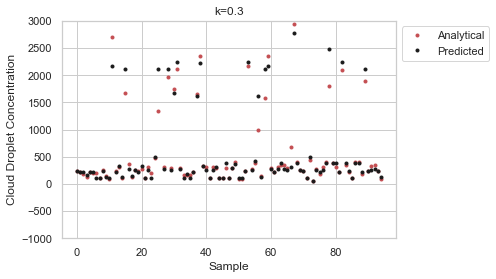

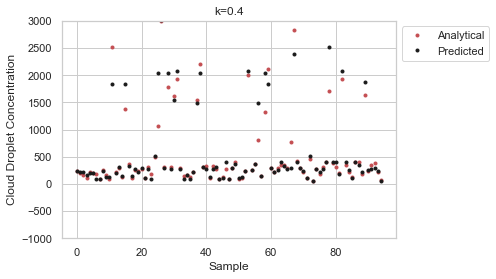

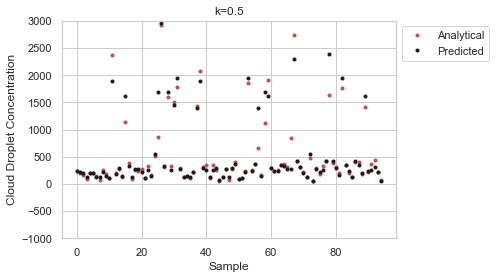

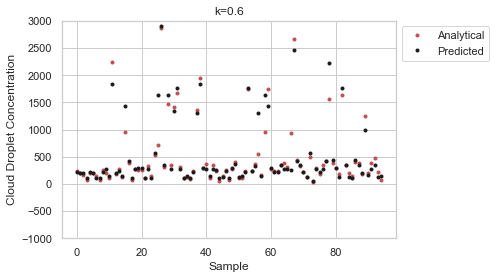

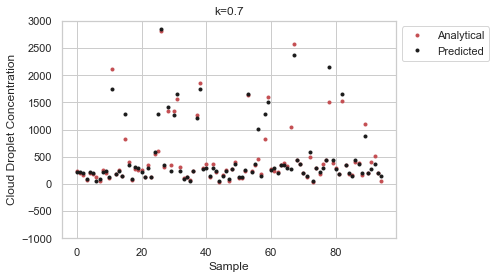

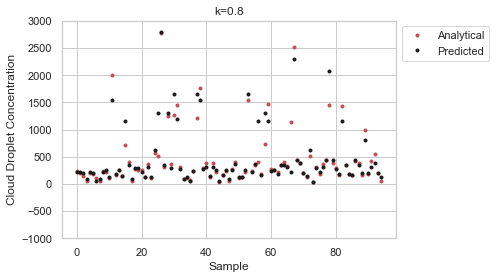

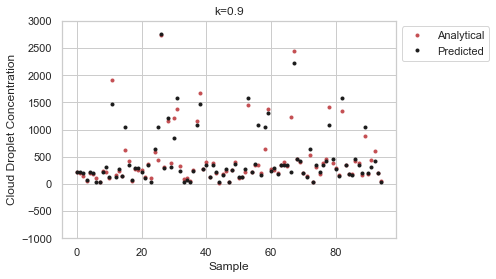

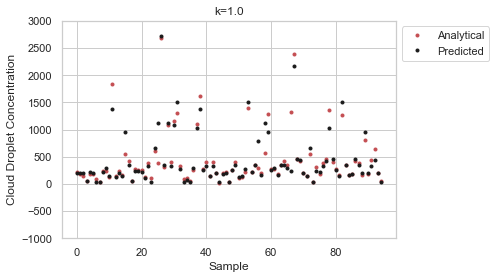

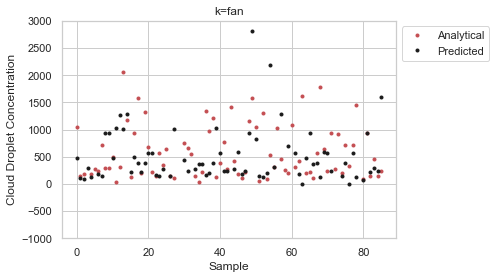

In [215]:
k=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,'fan']
r2=[]
for s in k:
    if s!='fan':
        cdc=data[f'CDC_pinsky,k={s}']
    else:
        cdc=data['CDC_Fan']
    lwc=data['LWC']
    v=data['Mean_Doppler_Velocity']
    t=data['T(K)']
    ccn=data['CCN']
    d=np.column_stack([lwc,np.abs(v),t,ccn,cdc])
    d= np.array(d[~np.isnan(d).any(axis=1)])
    d=d[np.isfinite(d).all(1)]
    d[d[:,-1]<4000]
    X=d[:,:-1]
    y=d[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=20)    
    regressor=DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    r22=r2_score(y_test,y_pred)
    r2.append(r22)
    plt.plot(y_test,'r.',label='Analytical')
    plt.plot(y_pred,'k.',label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Cloud Droplet Concentration')
    plt.title(f'k={s}')
    plt.ylim(-1000,3000)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()
dt={'k':k,'R^2':r2}
dt=pd.DataFrame(dt)

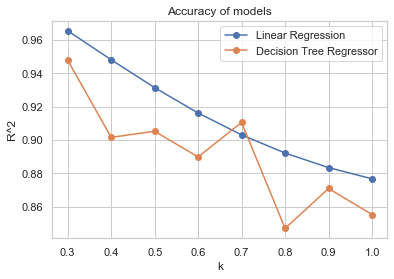

In [216]:
plt.plot(df_linr['k'][:-1],df_linr['R^2'][:-1],'o-',label='Linear Regression')
plt.plot(dt['k'][:-1],dt['R^2'][:-1],'o-',label='Decision Tree Regressor')
plt.xlabel('k')
plt.ylabel('R^2')
plt.title('Accuracy of models')
plt.legend()
plt.show()

# Random States

In [230]:
states=np.linspace(0,100,101)
k=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,'fan']
overall_r=[]
for s in k:
    r2=[]
    m=[]
    if s!='fan':
        cdc=data[f'CDC_pinsky,k={s}']
    else:
        cdc=data['CDC_Fan']
    lwc=data['LWC']
    v=data['Mean_Doppler_Velocity']
    t=data['T(K)']
    ccn=data['CCN']
    d=np.column_stack([lwc,np.abs(v),t,ccn,cdc])
    d= np.array(d[~np.isnan(d).any(axis=1)])
    d=d[np.isfinite(d).all(1)]
    d[d[:,-1]<4000]
    X=d[:,:-1]
    y=d[:,-1]
    for state in states:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=int(state))
        regressor=LinearRegression().fit(X_train,y_train)
#        regressor.fit(X_train,y_train)
        y_pred=regressor.predict(X_test)
        loc=np.argwhere(y_pred<0)
        if len(loc)>0:
            print('Negative predictions present')
        r22=r2_score(y_test,y_pred)
        r2.append(r22)
    overall_r.append(r2)

Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predi

Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predi

Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predictions present
Negative predi

In [231]:
states=np.linspace(0,100,101)
k=[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,'fan']
overall=[]
for s in k:
    r2=[]
    m=[]
    if s!='fan':
        cdc=data[f'CDC_pinsky,k={s}']
    else:
        cdc=data['CDC_Fan']
    lwc=data['LWC']
    v=data['Mean_Doppler_Velocity']
    t=data['T(K)']
    ccn=data['CCN']
    d=np.column_stack([lwc,np.abs(v),t,ccn,cdc])
    d= np.array(d[~np.isnan(d).any(axis=1)])
    d=d[np.isfinite(d).all(1)]
    d[d[:,-1]<4000]
    X=d[:,:-1]
    y=d[:,-1]
    for state in states:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=int(state))
        regressor=DecisionTreeRegressor(random_state=0)
        regressor.fit(X_train,y_train)
        y_pred=regressor.predict(X_test)
        loc=np.argwhere(y_pred<0)
        if len(loc)>0:
            print('Negative predictions present')
        r22=r2_score(y_test,y_pred)
        r2.append(r22)
    overall.append(r2)

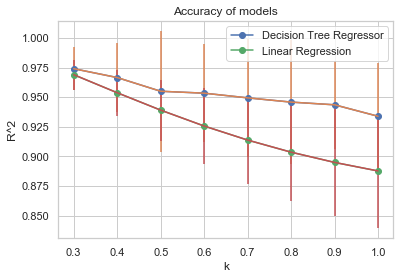

In [220]:
plt.plot(df_linr['k'][:-1],[np.mean(x) for x in overall[:-1]],'o-',label='Decision Tree Regressor')
plt.errorbar(df_linr['k'][:-1],[np.mean(x) for x in overall[:-1]],yerr=[np.std(x) for x in overall[:-1]])
plt.plot(df_linr['k'][:-1],[np.mean(x) for x in overall_r[:-1]],'o-',label='Linear Regression')
plt.errorbar(df_linr['k'][:-1],[np.mean(x) for x in overall_r[:-1]],yerr=[np.std(x) for x in overall_r[:-1]])
plt.xlabel('k')
plt.ylabel('R^2')
plt.title('Accuracy of models')
plt.legend()
plt.show()